# Sake tasting 
A few days ago I went to Fushimi, a small town in Kyoto with very pure well water which usually leads to the production of very good sake.

I find it quite hard to figure out what kind of sake I like, so I decided to rate each sake and see if I could make sense of it. My main concern, was that people like alcohol more, the more alcohol they drink up until a point. Really we should have randomised our drinking order, or done repeats but I don't want to.

Ratings were taken in round robin format from Geo, to Laura to Joe. Though Joe had already decided on his answer internally and cannot be influenced.
## Import packages

Sake data
* Distribution of sake type
* Distribution of alcohol percentage
* Distribution of Sake Meter value

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
plt.style.use('ggplot')

# Seaborn plot styles
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=2)

## Read Data

In [116]:
df = pd.read_csv('data/data.csv')
df.head()

,Sake Number,Geo,Joe,Laura,Sake Type,Alocohol Percentage,Sake meter value,Notes
0,1,7.0,8,5,Junmai,13.0,-34.0,NaN
1,2,3.0,3,3,Junmai,17.0,NaN,Nigorizake
2,3,5.0,7,7,Daiginjo,15.5,3.0,NaN
3,4,7.0,8,8,Junmai Ginjo,15.5,1.0,NaN
4,5,6.0,7,9,Junmai Ginjo,15.0,3.0,NaN


## Data Dictionary
1. Sake number - The sakes tasted, in order of tasting
2. Geo - Geo's ratings out of ten
3. Joe - Joe's ratings out of ten
4. Laura - Lauras's ratings out of ten
5. Sake type - refers to the polish rate of rice used, and whether distilled alcohol is added or not. More on this later.
6. Alcohol percentage.
7. Sake meter value - A measure of "sweetness"(-ve) to "spiciness"(+ve)
8. Notes, other text data I am not sure how to measure

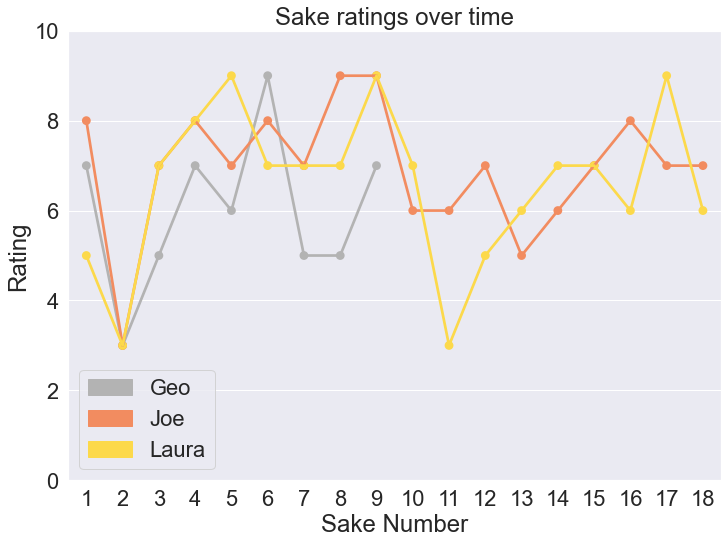

In [117]:
# sns.lineplot(x=df["Sake Number"], y=df[["Geo","Joe"]])
fig, ax = plt.subplots()
ax = sns.pointplot(x='Sake Number', y='Geo', data=df,  color='#B3B3B3').set(title='Sake ratings over time')
ax1 = sns.pointplot(x='Sake Number', y='Joe', data=df, color='#F28C60')
ax2 = sns.pointplot(x='Sake Number', y='Laura', data=df, color='#FCD94B')

plt.ylabel('Rating')
ax2.set_ylim(0, 10)
grey_patch = mpatches.Patch(color='#B3B3B3', label='The red data')
orange_patch = mpatches.Patch(color='#F28C60', label='The red data')
yellow_patch = mpatches.Patch(color='#FCD94B', label='The red data')
plt.legend(labels=["Geo","Joe","Laura"],handles=[grey_patch,orange_patch,yellow_patch ])


## At a glance
It doesn't really look like we liked our sake more over time. We also see that after Geo had 9 Sakes, she simply didn't want to have any more. Short of one sake, Geo always liked sake less than Joe and Laura though this may be as symtpom of rating first.

## Average rankings

[Text(0.5, 1.0, 'Sake ratings over time'), (0.0, 10.0)]

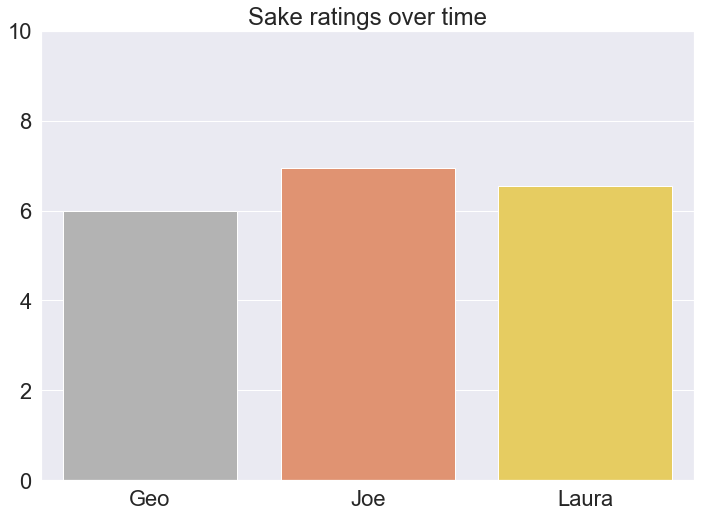

In [139]:
colors = sns.color_palette(["#B3B3B3", "#F28C60", "#FCD94B"])

sns.barplot(
    x= ['Geo', 'Joe', 'Laura'],
    y= [df['Geo'].mean(),df['Joe'].mean(),df['Laura'].mean()],
    palette=colors
).set(title='Sake ratings over time', ylim=(0,10))

On average Georgina liked Sake the least, further evidenced by her not wanting to have 18 Sakes. Joe likes them the most, or at least pretends to. On average we like sake, or we rank all sakes too high.

## Best Sake
To calculate best and worst sake, we may as well average our sake scores. Since we lose a voter halfway through, and the remaining sake voters liked sake a bit more it's likely a later sake should win.

In [152]:
df['Score'] = df[['Geo', 'Joe', 'Laura']].mean(axis=1)

[Text(0.5, 1.0, 'Sake rating averages'), (0.0, 10.0)]

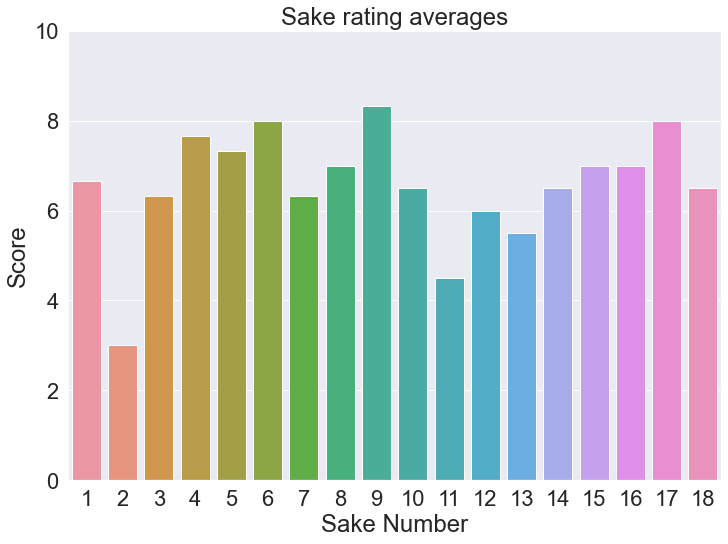

In [156]:
sns.barplot(data=df, x="Sake Number", y="Score").set(title="Sake rating averages", ylim=(0,10))

In [157]:
df['Score'].max()

8.333333333333334

In [158]:
df['Score'].min()

3.0

## Best and worst sake
Our best sake has a rating of 8.3, this was the last one Geo tasted so that seems a little fairer. This is the Aiyama sake by http://www.fushimi.or.jp/sake_guide/sakagura/matsumoto/.

The lowest sake was Nakagumi. This was the only Nigorizake in our set. See https://en.wikipedia.org/wiki/Nigori. This one was cloudy, and a little fizzy whereas the others were a lot more like water.

## What did we like?

                     Sake Number       Geo       Joe     Laura  \
Sake Number             1.000000  0.210819  0.011528  0.106648   
Geo                     0.210819  1.000000  0.680545  0.493710   
Joe                     0.011528  0.680545  1.000000  0.550243   
Laura                   0.106648  0.493710  0.550243  1.000000   
Alocohol Percentage     0.516124 -0.299778 -0.266417  0.032619   
Sake meter value        0.466826 -0.067721 -0.385658  0.217032   
Score                   0.160482  0.827220  0.830689  0.863311   

                     Alocohol Percentage  Sake meter value     Score  
Sake Number                     0.516124          0.466826  0.160482  
Geo                            -0.299778         -0.067721  0.827220  
Joe                            -0.266417         -0.385658  0.830689  
Laura                           0.032619          0.217032  0.863311  
Alocohol Percentage             1.000000          0.514123 -0.057155  
Sake meter value                0.514123     

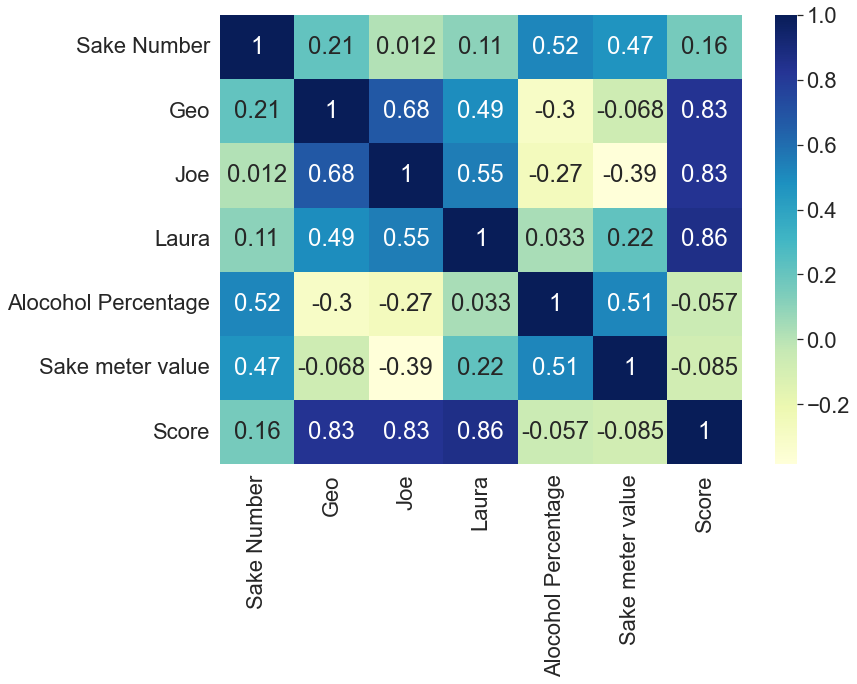

In [165]:
print(df.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In the above plot, the closer a number is to 1, the more positively correlated two variables are. That means if variable one goes up, usually variable 2 does as well. And the same for them going down. The closer it is the -1, the more negatively correlated two variables are.

We can see a high correlation between all three tasters, meaning we largely vote together, a better sake on average get's better votes from all of us.

Looking at the correlation between The Sake Number and our score sort of answers "Did we like sakes more the longer we tasted". We can see the Score has a slight positive correlation which seems to suggest that is the case, though I suspect this is weighted to the first half of the tasting. We can see Joe had almost zero correlation here, suggesting he is very fair and kind.

We also see that the yet uncovered alcohol percentage, and sake meter values have no correlation to the scores given. Though it is subtle and could be intepreted as the more alcoholic, the less sweet the higher we score.

# Sake data
We have perhaps missed a trick here. Our lowest sake, was a special type of sake. We have not quantified the sake types in this dataset to.

In the below chart we look at what people who like Sake use to qualify good Sake. Similar to how good wines are better with age, weather and the grapes used; Sake is instead supposed to be fresh, the newer the sake the better, the more polished the rice used the better, the purer the water used the better. Terms used to qualify sake are regulated but usually a good indicator of good(or expensive) sake.

There are also two sake styles, one with and one without added alcohol. Generally the purity of rice flavor is considered higher quality here.

With this we could convert our sake type column, to a categorical column and then we can check correlation with it.

I have no idea how to rank a Daiginjo vs a Junmai, so I am going to seperate these into Pure rice and alcohol added style to check these hunches

I also have no idea what a special Junmai is? I think it means they are brewed in a more unique style.

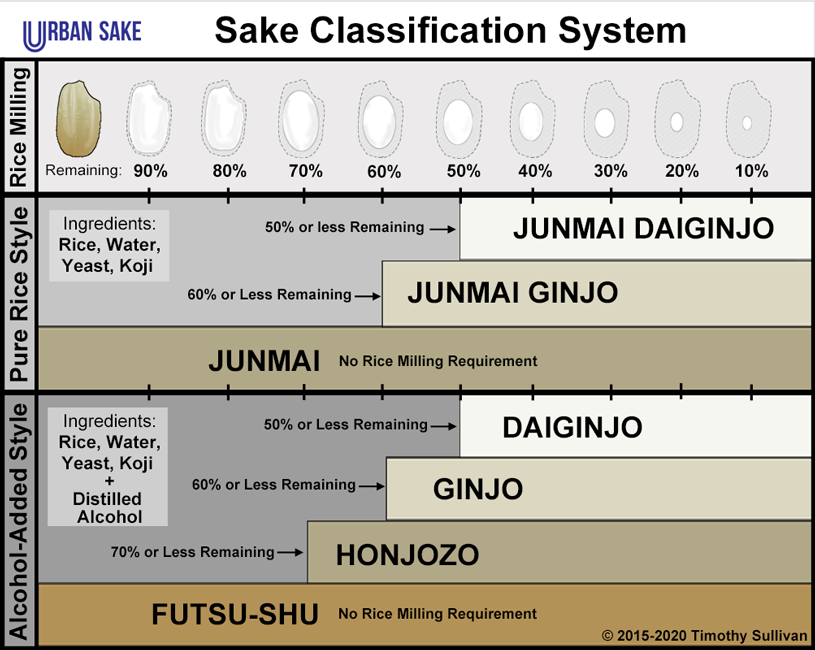

In [180]:
df['Sake Type'].value_counts()

Futsu              4
Junmai             3
Junmai Ginjo       3
Special Junmai     3
Daiginjo           2
Junmai Daiginjo    2
Name: Sake Type, dtype: int64

In [184]:
pureRiceDF = df[(df['Sake Type'] == 'Junmai') | (df['Sake Type'] == 'Special Junmai') | (df['Sake Type'] == 'Junmai Ginjo') | (df['Sake Type'] == 'Junmai Daiginjo')]
alcoholAddedDF = df[(df['Sake Type'] == 'Futsu') | (df['Sake Type'] == 'Daiginjo')]

In [192]:
pureRiceMapper = {'Junmai': 1, 'Special Junmai':2,'Junmai Ginjo':3,'Junmai Daiginjo':4}
alcoholMapper = {'Futsu':1, 'Daiginjo':2}

pureRiceDF['Sake Type Ordinal'] = pureRiceDF['Sake Type'].replace(pureRiceMapper)
alcoholAddedDF['Sake Type Ordinal'] = alcoholAddedDF['Sake Type'].replace(alcoholMapper)

/var/folders/k6/5jfk6t556clfdbn2jmpzglh80000gn/T/ipykernel_88893/1992264739.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pureRiceDF['Sake Type Ordinal'] = pureRiceDF['Sake Type'].replace(pureRiceMapper)
/var/folders/k6/5jfk6t556clfdbn2jmpzglh80000gn/T/ipykernel_88893/1992264739.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alcoholAddedDF['Sake Type Ordinal'] = alcoholAddedDF['Sake Type'].replace(alcoholMapper)


In [193]:
pureRiceDF.head()

,Sake Number,Geo,Joe,Laura,Sake Type,Alocohol Percentage,Sake meter value,Notes,Score,Sake Type Ordinal
0,1,7.0,8,5,Junmai,13.0,-34.0,NaN,6.666667,1
1,2,3.0,3,3,Junmai,17.0,NaN,Nigorizake,3.000000,1
3,4,7.0,8,8,Junmai Ginjo,15.5,1.0,NaN,7.666667,3
4,5,6.0,7,9,Junmai Ginjo,15.0,3.0,NaN,7.333333,3
5,6,9.0,8,7,Junmai Daiginjo,16.0,3.0,NaN,8.000000,4


## Pure Rice

[Text(0.5, 1.0, 'Sake rating averages'), (0.0, 4.0)]

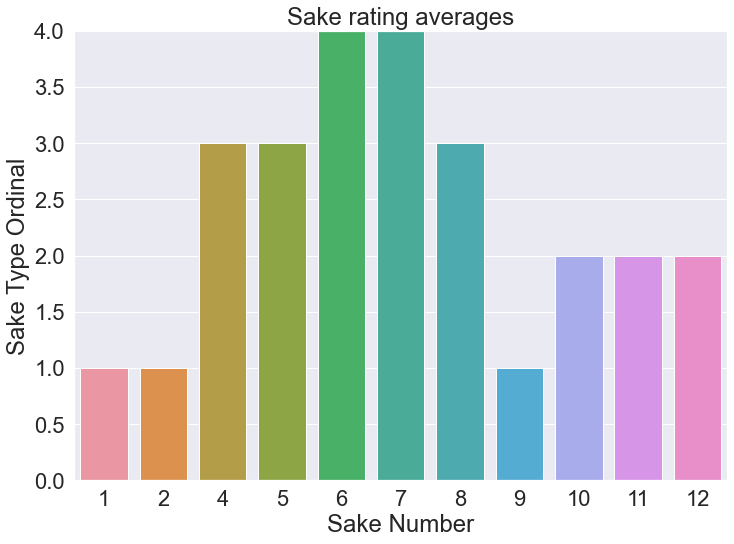

In [199]:
sns.barplot(data=pureRiceDF, x="Sake Number", y="Sake Type Ordinal").set(title="Sake rating averages", ylim=(0,4))

                     Sake Number       Geo       Joe     Laura  \
Sake Number             1.000000  0.161377  0.149985  0.022730   
Geo                     0.161377  1.000000  0.683346  0.510690   
Joe                     0.149985  0.683346  1.000000  0.658661   
Laura                   0.022730  0.510690  0.658661  1.000000   
Alocohol Percentage     0.367760 -0.298753 -0.470640  0.035704   
Sake meter value        0.668269  0.044839 -0.237178  0.281336   
Score                   0.061605  0.829678  0.884130  0.880215   
Sake Type Ordinal       0.092424  0.271607  0.295964  0.403786   

                     Alocohol Percentage  Sake meter value     Score  \
Sake Number                     0.367760          0.668269  0.061605   
Geo                            -0.298753          0.044839  0.829678   
Joe                            -0.470640         -0.237178  0.884130   
Laura                           0.035704          0.281336  0.880215   
Alocohol Percentage             1.000000     

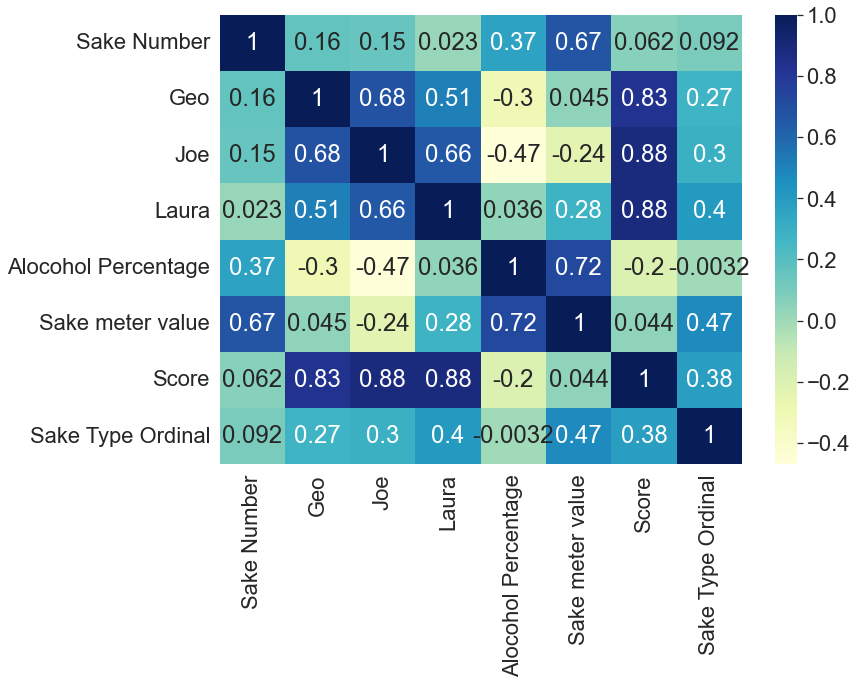

In [194]:
print(pureRiceDF.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(pureRiceDF.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

## Added Alcohol

[Text(0.5, 1.0, 'Sake rating averages'), (0.0, 2.0)]

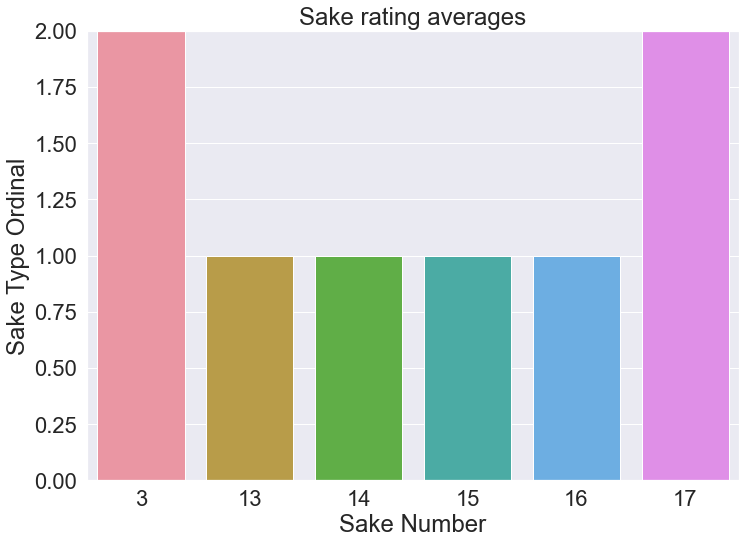

In [202]:
sns.barplot(data=alcoholAddedDF, x="Sake Number", y="Sake Type Ordinal").set(title="Sake rating averages", ylim=(0,2))

                     Sake Number  Geo       Joe     Laura  \
Sake Number             1.000000  NaN  0.075955  0.179029   
Geo                          NaN  NaN       NaN       NaN   
Joe                     0.075955  NaN  1.000000  0.176777   
Laura                   0.179029  NaN  0.176777  1.000000   
Alocohol Percentage     0.393825  NaN  0.304997 -0.269582   
Sake meter value       -0.201433  NaN -0.942138 -0.498355   
Score                   0.477887  NaN  0.683317  0.765791   
Sake Type Ordinal      -0.455733  NaN  0.250000  0.707107   

                     Alocohol Percentage  Sake meter value     Score  \
Sake Number                     0.393825         -0.201433  0.477887   
Geo                                  NaN               NaN       NaN   
Joe                             0.304997         -0.942138  0.683317   
Laura                          -0.269582         -0.498355  0.765791   
Alocohol Percentage             1.000000         -0.519208  0.137629   
Sake meter value  

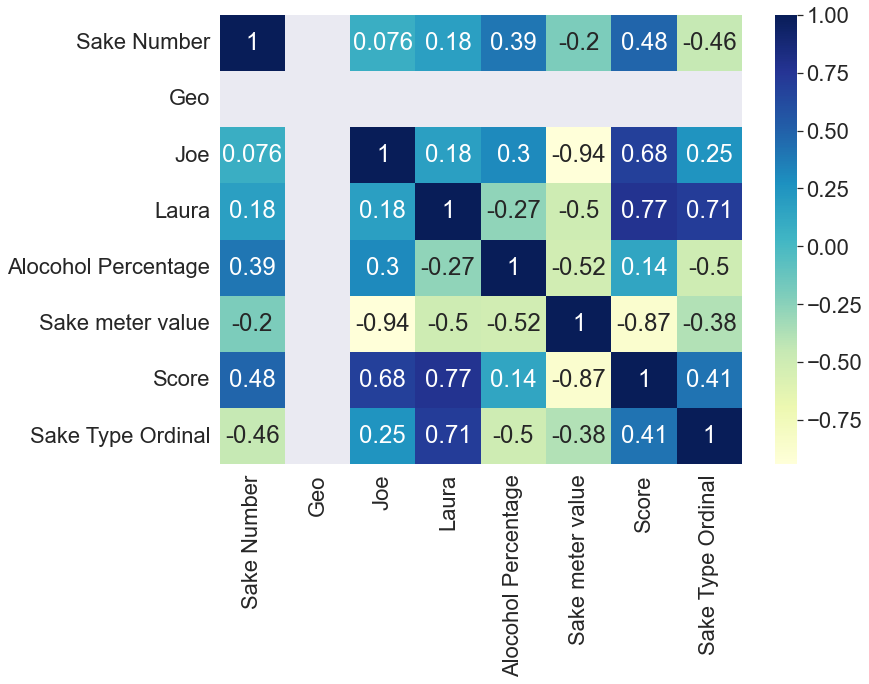

In [204]:
print(alcoholAddedDF.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(alcoholAddedDF.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

## Conclusion
It seems in both cases, our scores seem to correlate postively with the quality of the sake. I know personally we basically liked it more the less what we tasted, tasted like harsh alcohol. The higher quality ones seemed to generally not "hurt" when we drank them.